In [1]:
%run preamble.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# /getStats Dataset
#
DS_NAME="GetState"
FILENAME="datasets/{}-{}.npy".format(6 * 7 * 24, 60 * 10)
DS_DATA = np.load(FILENAME, allow_pickle=True)
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

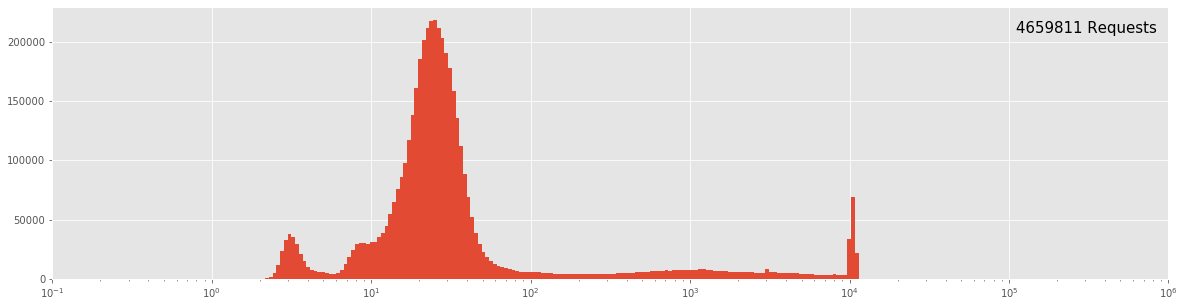

In [3]:
total = np.concatenate(DS_DATA)
ax = log_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

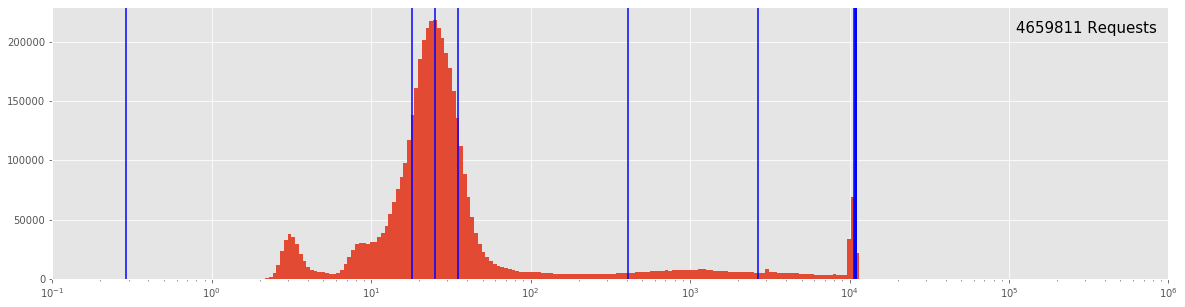

In [8]:
log_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

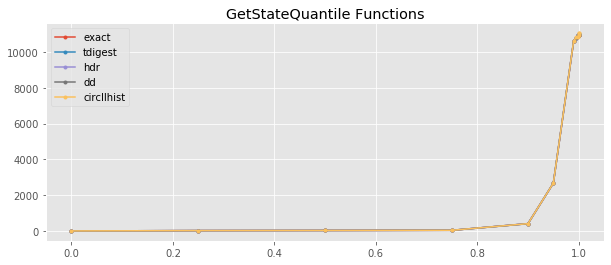

In [11]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.savefig("images/" + DS_NAME + "_quantile_comparison")

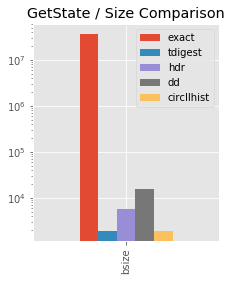

In [13]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Size Comparison")
plt.savefig("images/" + DS_NAME + "_size")

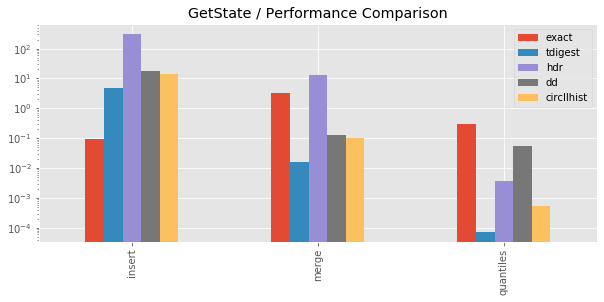

In [14]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Performance Comparison")
plt.savefig("images/" + DS_NAME + "_perf")

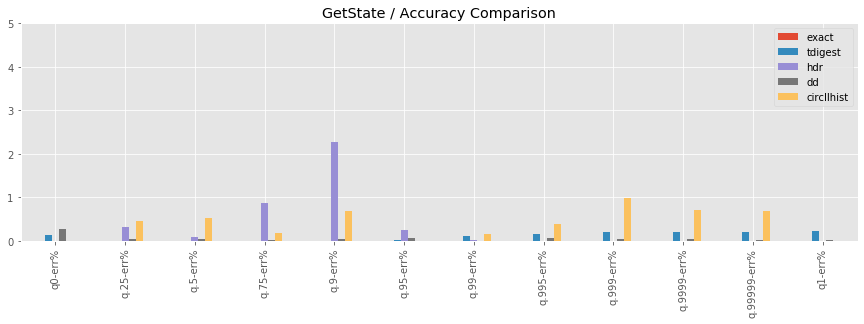

In [17]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("linear")
plt.ylim(0, 5)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")